In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from grid import create_grid_synopsis
from lloyd import lloyd_with_weights
from util import normalise

       0     1      count
0  -0.75 -0.75   9.249996
1  -0.75 -0.25  20.283556
2  -0.75  0.25   3.085400
3  -0.75  0.75   2.065366
4  -0.25 -0.75  31.499502
5  -0.25 -0.25  45.329789
6  -0.25  0.25  33.344719
7  -0.25  0.75  13.154968
8   0.25 -0.75  14.740519
9   0.25 -0.25  31.984907
10  0.25  0.25  72.665032
11  0.25  0.75  43.762419
12  0.75 -0.75   0.293998
13  0.75 -0.25   1.803693
14  0.75  0.25  18.181015
15  0.75  0.75  15.905179
[[-0.21129212 -0.30098165]
 [ 0.3055224   0.46811285]]


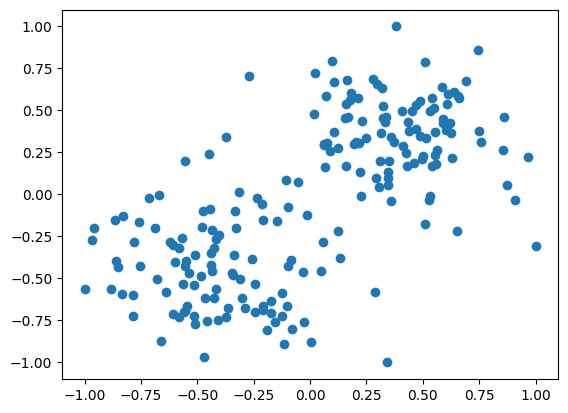

In [17]:
data1 = np.random.multivariate_normal(mean=[1,1], cov=[[1,0],[0,1]], size=100)
df1 = pd.DataFrame(data1)
data2 = np.random.multivariate_normal(mean=[4,4], cov=[[1,0],[0,1]], size=100)
df2 = pd.DataFrame(data2)
df = normalise(pd.concat([df1, df2]))
plt.scatter(x=df[0], y=df[1])

In [18]:
weighted_points = create_grid_synopsis(df, 1, 2, 2)

In [19]:
weighted_points.head()

,0,1,count
0,-0.75,-0.75,13.072485
1,-0.75,-0.25,23.545228
2,-0.75,0.25,1.313224
3,-0.75,0.75,1.223019
4,-0.25,-0.75,23.776859


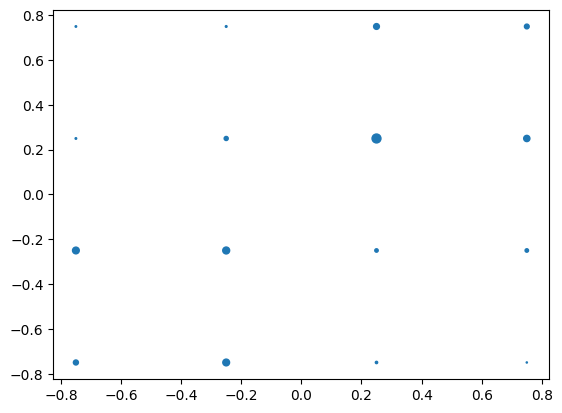

In [20]:
plt.scatter(x=weighted_points[0], y=weighted_points[1], s=weighted_points["count"])

In [21]:
centers = pd.DataFrame(lloyd_with_weights(2, weighted_points.iloc[:, :-1], weighted_points.iloc[:, -1], n_iter=10))
print(centers)

          0         1
0 -0.433640 -0.387760
1  0.427269  0.330616


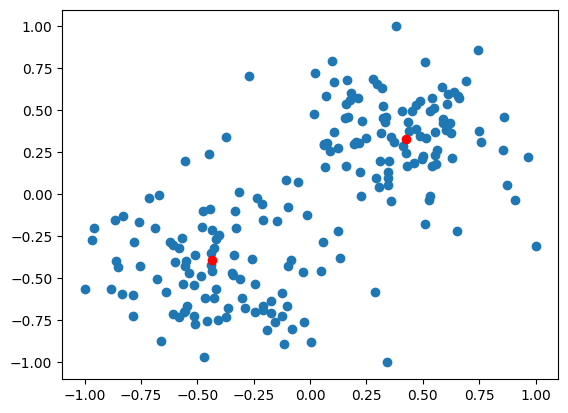

In [22]:
plt.scatter(x=df[0], y=df[1])
plt.scatter(x=centers[0], y=centers[1], color="red")